In [7]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import joblib

In [85]:
data = pd.read_csv('./data/amine_treatment-final.csv', on_bad_lines='skip')
data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
0,52.0,6701.325,259647.0,24.668523,80.705482,0.000000,3217.216383,0.031875,0.633122,0.192729,...,0.000004,1.979803e-06,6.785930e-06,3.039502e-08,1.629357e-07,0.014838,0.910916,0.062270,22521.880092,23245.607009
1,40.0,6701.325,63853.0,23.411939,79.292250,0.000000,805.286774,0.039520,0.681947,0.179992,...,0.000006,1.099164e-07,7.886635e-07,2.425456e-06,2.679624e-08,0.010470,0.896612,0.077190,15891.219056,30468.484150
2,46.0,6701.325,15928.0,27.803853,108.358884,0.000000,146.993024,0.027859,0.577870,0.163095,...,0.000018,5.179434e-05,2.863001e-05,4.721545e-06,1.359401e-06,0.001284,0.860268,0.132676,1949.372531,10648.306282
3,36.0,6701.325,150276.0,22.053344,74.092459,0.000000,2028.222609,0.005420,0.856717,0.000249,...,0.000039,8.734358e-06,3.706189e-05,5.426945e-05,3.949909e-06,0.001233,0.809722,0.184359,1871.528366,8438.736973
4,12.0,6701.325,52691.0,24.334510,114.182302,0.002870,461.460940,0.027297,0.694634,0.091063,...,0.000100,7.719691e-05,2.661312e-05,1.351350e-05,6.619552e-06,0.003300,0.788340,0.200715,5008.207346,14011.150105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512795,18.0,6701.325,278813.0,27.267819,147.437736,0.239690,1890.816202,0.036621,0.666807,0.042159,...,0.000053,1.226987e-04,3.336251e-05,4.145371e-06,8.510407e-06,0.002101,0.796328,0.187149,3188.443718,27411.897443
512796,33.0,6701.325,72612.0,26.629816,112.530303,0.000000,645.266193,0.025383,0.605142,0.150361,...,0.000049,8.271254e-05,1.199104e-05,1.810930e-06,4.749955e-06,0.003784,0.826966,0.162727,5742.847844,11941.343733
512797,17.0,6701.325,272718.0,26.290335,135.390018,0.133398,2014.180541,0.039356,0.606850,0.167318,...,0.000037,2.874297e-05,3.343060e-06,1.045919e-05,2.187381e-06,0.045335,0.725301,0.179546,68812.636471,97071.672175
512798,59.0,6701.325,75970.0,24.231673,73.727565,0.000000,1030.415146,0.037951,0.732049,0.086286,...,0.000013,1.782460e-05,8.286743e-06,5.417825e-06,2.393693e-07,0.002551,0.877567,0.106280,3871.441495,26287.366187


In [86]:
data['rich_amine molar flow, kgmol/h'] = data['rich_amine mass flow, kg/h'] / data['rich_amine molecular weight']


data['rich_amine H2S molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2S mol frac']
data['rich_amine CO2 molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine CO2 mol frac']
data['rich_amine Methane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Methane mol frac']
data['rich_amine Ethane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Ethane mol frac']
data['rich_amine Propane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine Propane mol frac']
data['rich_amine i-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Butane mol frac']
data['rich_amine n-Butane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Butane mol frac']
data['rich_amine i-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine i-Pentane mol frac']
data['rich_amine n-Pentane molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine n-Pentane mol frac']
data['rich_amine H2O molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine H2O mol frac']
data['rich_amine MDEAmine molar flow, kgmol/h'] = data['rich_amine molar flow, kgmol/h'] * data['rich_amine MDEAmine mol frac']
data['rich_amine sour comp molar flow, kgmol/h'] = data['rich_amine H2S molar flow, kgmol/h'] + data['rich_amine CO2 molar flow, kgmol/h']

data['feed_gas molar flow, kgmol/h'] = data['feed_gas mass flow, kg/h'] / data['feed_gas molecular weight']
data['feed_gas H2S molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2S mol frac']
data['feed_gas CO2 molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas CO2 mol frac']
data['feed_gas Methane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Methane mol frac']
data['feed_gas Ethane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Ethane mol frac']
data['feed_gas Propane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas Propane mol frac']
data['feed_gas i-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Butane mol frac']
data['feed_gas n-Butane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Butane mol frac']
data['feed_gas i-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas i-Pentane mol frac']
data['feed_gas n-Pentane molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas n-Pentane mol frac']
data['feed_gas H2O molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas H2O mol frac']
data['feed_gas MDEAmine molar flow, kgmol/h'] = data['feed_gas molar flow, kgmol/h'] * data['feed_gas MDEAmine mol frac']


data['lean_amine molar flow, kgmol/h'] = data['lean_amine mass flow, kg/h'] / data['lean_amine molecular weight']
data['lean_amine H2S molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2S mol frac']
data['lean_amine CO2 molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine CO2 mol frac']
data['lean_amine Methane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Methane mol frac']
data['lean_amine Ethane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Ethane mol frac']
data['lean_amine Propane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine Propane mol frac']
data['lean_amine i-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Butane mol frac']
data['lean_amine n-Butane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Butane mol frac']
data['lean_amine i-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine i-Pentane mol frac']
data['lean_amine n-Pentane molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine n-Pentane mol frac']
data['lean_amine H2O molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine H2O mol frac']
data['lean_amine MDEAmine molar flow, kgmol/h'] = data['lean_amine molar flow, kgmol/h'] * data['lean_amine MDEAmine mol frac']

data['sweet_gas molar flow, kgmol/h'] = data['sweet_gas mass flow, kg/h'] / data['sweet_gas molecular weight']
data['sweet_gas H2S molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2S mol frac']
data['sweet_gas CO2 molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas CO2 mol frac']
data['sweet_gas Methane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Methane mol frac']
data['sweet_gas Ethane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Ethane mol frac']
data['sweet_gas Propane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas Propane mol frac']
data['sweet_gas i-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Butane mol frac']
data['sweet_gas n-Butane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Butane mol frac']
data['sweet_gas i-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas i-Pentane mol frac']
data['sweet_gas n-Pentane molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas n-Pentane mol frac']
data['sweet_gas H2O molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas H2O mol frac']
data['sweet_gas MDEAmine molar flow, kgmol/h'] = data['sweet_gas molar flow, kgmol/h'] * data['sweet_gas MDEAmine mol frac']

In [87]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()

# Определение молярного расхода верха колонны

In [109]:
column_top_molar_flow_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

In [110]:
column_top_molar_flow_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h","feed_gas Methane molar flow, kgmol/h","feed_gas Ethane molar flow, kgmol/h","feed_gas Propane molar flow, kgmol/h",...,"lean_amine temperature, C","lean_amine mass flow, kg/h",lean_amine molecular weight,"lean_amine Mass density, kg/m3","lean_amine molar flow, kgmol/h","lean_amine H2S molar flow, kgmol/h","lean_amine CO2 molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,5870.716712,116.240769,131.495260,4009.062337,575.943410,288.120820,...,34.992685,361132.352397,32.744629,1040.235933,11541.804252,2.884096,33.501414,9999.846673,1505.572069,5657.648995
std,14.726834,86277.067509,2.254273,41.131813,3433.502523,102.808912,102.021061,2488.283871,500.307503,250.349018,...,14.695711,196058.939546,6.566487,13.984821,6962.873087,2.095730,25.994329,6497.662992,981.655992,3340.435678
min,10.000000,1000.000000,17.630435,48.732168,33.338025,0.005353,0.207002,16.662736,0.000933,0.000202,...,10.000000,15000.000000,18.043180,973.756588,299.356341,0.035062,0.325252,194.673346,0.006981,0.004180
25%,22.000000,74990.500000,24.160098,85.483707,2916.163761,31.849751,49.448425,1929.630171,161.870547,80.995843,...,22.000000,192367.500000,28.099839,1032.383569,5868.173579,1.269090,13.449371,4897.851465,661.819137,2782.531515
50%,35.000000,149553.500000,25.725828,100.138569,5814.068691,86.399253,105.853246,3841.024204,436.326591,218.194499,...,35.000000,361664.500000,33.812730,1041.412657,11045.326239,2.429430,26.934611,9224.920955,1384.967497,5591.793562
75%,48.000000,224502.000000,27.293888,122.779305,8728.900707,176.810764,193.917310,5821.054095,880.027025,439.906736,...,48.000000,530754.250000,37.526382,1050.665489,16263.162662,4.056679,47.760824,13765.564888,2259.367346,8428.333741
max,60.000000,300000.000000,33.967309,341.551374,16404.642557,598.000656,585.760027,15013.476119,2728.899406,1347.803534,...,60.000000,700000.000000,56.744250,1070.914903,38549.039746,15.147930,190.433750,38445.322887,4640.158398,16132.965175


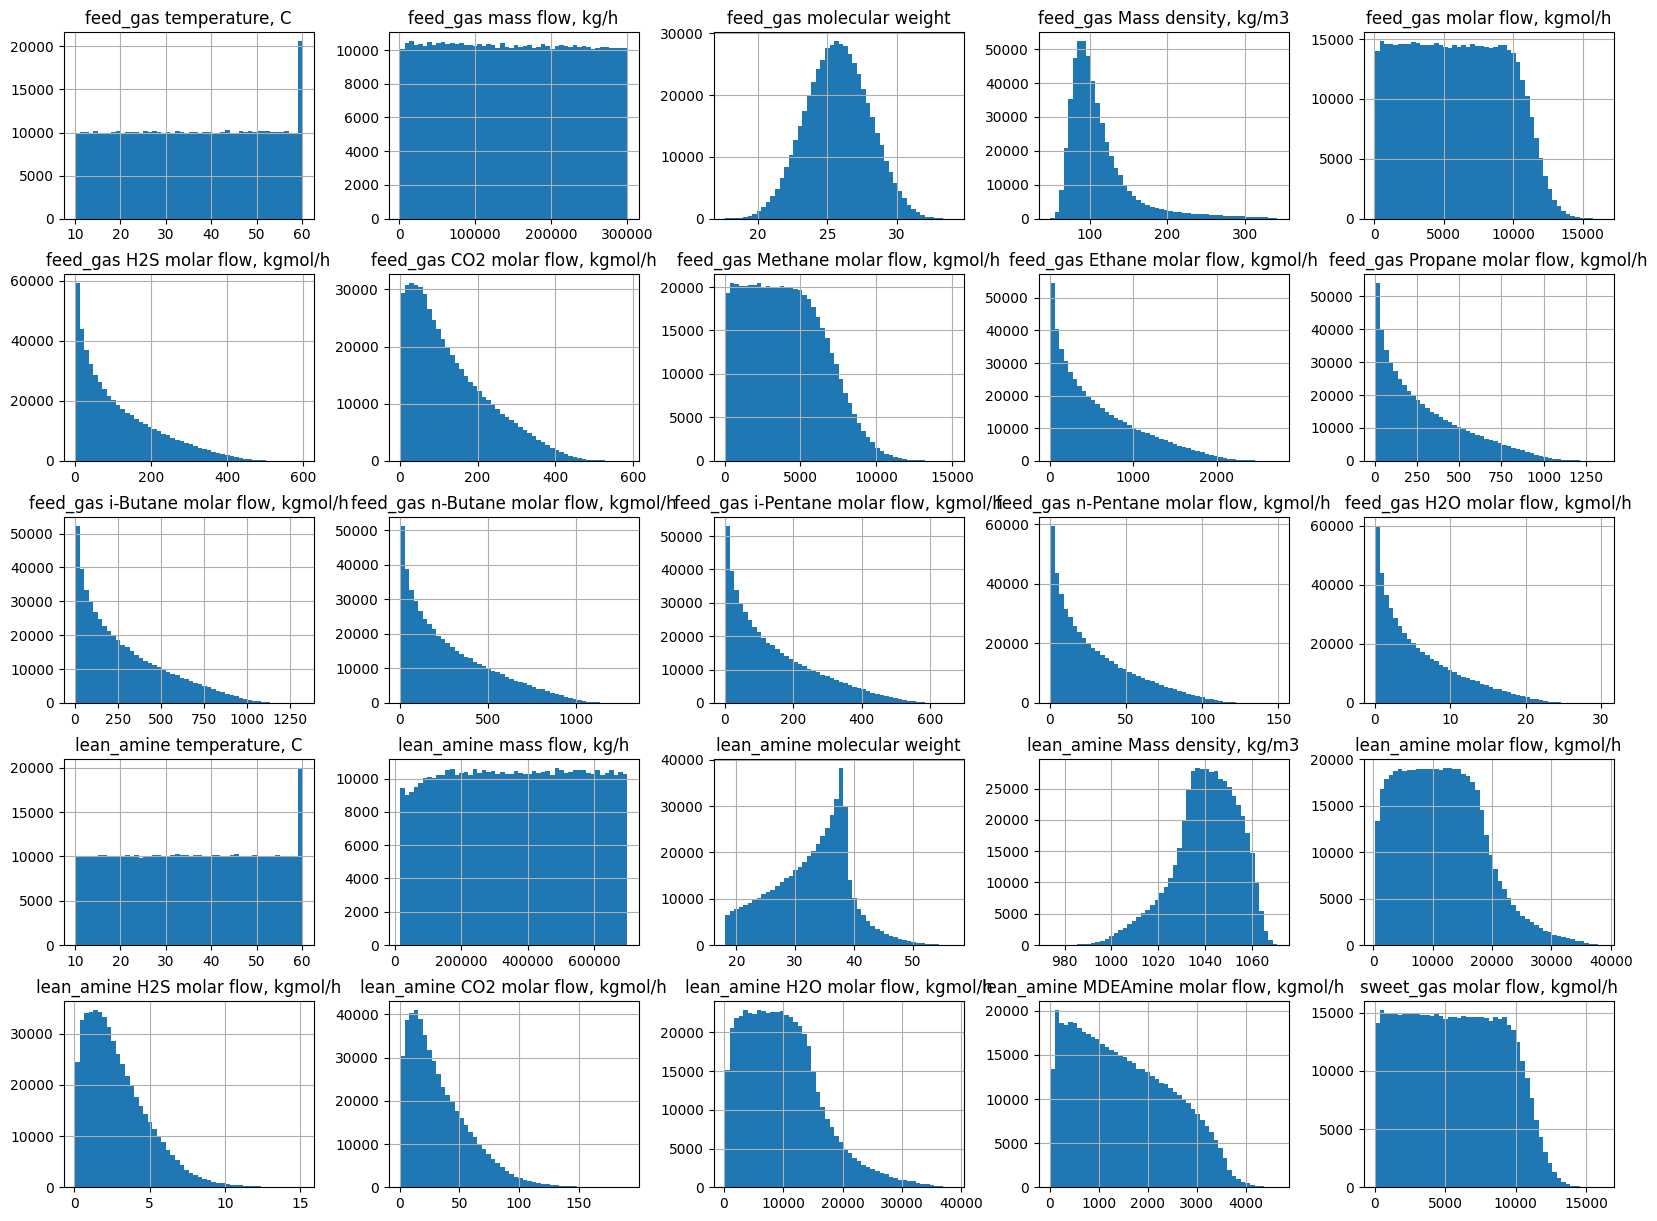

In [111]:
column_top_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [112]:
corr_matrix = column_top_molar_flow_data.corr()

corr_matrix['sweet_gas molar flow, kgmol/h'].sort_values(ascending=False)

sweet_gas molar flow, kgmol/h              1.000000
feed_gas molar flow, kgmol/h               0.999501
feed_gas mass flow, kg/h                   0.983003
feed_gas Methane molar flow, kgmol/h       0.977197
feed_gas CO2 molar flow, kgmol/h           0.731651
feed_gas H2O molar flow, kgmol/h           0.658286
feed_gas n-Pentane molar flow, kgmol/h     0.650699
feed_gas H2S molar flow, kgmol/h           0.629263
feed_gas Ethane molar flow, kgmol/h        0.622286
feed_gas i-Pentane molar flow, kgmol/h     0.622102
feed_gas Propane molar flow, kgmol/h       0.621656
feed_gas n-Butane molar flow, kgmol/h      0.604175
feed_gas i-Butane molar flow, kgmol/h      0.603087
feed_gas temperature, C                    0.003396
lean_amine CO2 molar flow, kgmol/h         0.002378
lean_amine H2O molar flow, kgmol/h         0.001681
lean_amine molar flow, kgmol/h             0.001497
lean_amine H2S molar flow, kgmol/h         0.001023
lean_amine mass flow, kg/h                 0.000674
lean_amine t

In [113]:
column_top_molar_flow_data_mini = column_top_molar_flow_data.sample(frac=0.5)

In [115]:
## Тестовая и обучающая выборки
X = column_top_molar_flow_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_molar_flow_data_mini[[
    'sweet_gas molar flow, kgmol/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((205120, 24), (205120, 1))

In [116]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_0 = column_top_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 7s 1ms/step - loss: 337.4825 - mae: 337.4825
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 34.5352 - mae: 34.5352
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 32.3636 - mae: 32.3636
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 30.0794 - mae: 30.0794
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.3839 - mae: 27.3839
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 26.4227 - mae: 26.4227
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.3552 - mae: 25.3552
Epoch 8/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.5662 - mae: 24.5662
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.0513 - mae: 24.0513
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 23.7134 - mae: 23.7134
Epoch 1

In [117]:
eval_0 = column_top_molar_flow_model_0.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 767us/step - loss: 33.1334 - mae: 33.1334


In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_1 = column_top_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 9s 1ms/step - loss: 188.1147 - mae: 188.1147
Epoch 2/20
6410/6410 [==============================] - 8s 1ms/step - loss: 34.0497 - mae: 34.0497
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 30.8153 - mae: 30.8153
Epoch 4/20
6410/6410 [==============================] - 8s 1ms/step - loss: 28.6478 - mae: 28.6478
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 27.7059 - mae: 27.7059
Epoch 6/20
6410/6410 [==============================] - 8s 1ms/step - loss: 26.6769 - mae: 26.6769
Epoch 7/20
6410/6410 [==============================] - 8s 1ms/step - loss: 26.1798 - mae: 26.1798
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 26.2842 - mae: 26.2842
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 26.2717 - mae: 26.2717
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 25.7817 - mae: 25.7817
Epoch 1

In [119]:
eval_1 = column_top_molar_flow_model_1.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 925us/step - loss: 22.5204 - mae: 22.5204


In [120]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_2 = column_top_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 10s 1ms/step - loss: 141.9430 - mae: 141.9430
Epoch 2/20
6410/6410 [==============================] - 9s 1ms/step - loss: 36.0725 - mae: 36.0725
Epoch 3/20
6410/6410 [==============================] - 10s 1ms/step - loss: 33.0936 - mae: 33.0936
Epoch 4/20
6410/6410 [==============================] - 10s 2ms/step - loss: 31.8978 - mae: 31.8978
Epoch 5/20
6410/6410 [==============================] - 9s 1ms/step - loss: 30.7227 - mae: 30.7227
Epoch 6/20
6410/6410 [==============================] - 9s 1ms/step - loss: 29.9052 - mae: 29.9052
Epoch 7/20
6410/6410 [==============================] - 10s 2ms/step - loss: 29.1796 - mae: 29.1796
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 29.3269 - mae: 29.3269
Epoch 9/20
6410/6410 [==============================] - 9s 1ms/step - loss: 28.8246 - mae: 28.8246
Epoch 10/20
6410/6410 [==============================] - 9s 1ms/step - loss: 28.6541 - mae: 28.6541
Epo

In [121]:
eval_2 = column_top_molar_flow_model_2.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 972us/step - loss: 22.3585 - mae: 22.3585


In [122]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_3 = column_top_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 17s 3ms/step - loss: 138.1490 - mae: 138.1490
Epoch 2/20
6410/6410 [==============================] - 16s 2ms/step - loss: 42.5543 - mae: 42.5543
Epoch 3/20
6410/6410 [==============================] - 16s 3ms/step - loss: 39.2364 - mae: 39.2364
Epoch 4/20
6410/6410 [==============================] - 14s 2ms/step - loss: 37.1438 - mae: 37.1438
Epoch 5/20
6410/6410 [==============================] - 16s 2ms/step - loss: 36.0507 - mae: 36.0507
Epoch 6/20
6410/6410 [==============================] - 14s 2ms/step - loss: 35.2835 - mae: 35.2835
Epoch 7/20
6410/6410 [==============================] - 14s 2ms/step - loss: 33.9033 - mae: 33.9033
Epoch 8/20
6410/6410 [==============================] - 15s 2ms/step - loss: 33.8079 - mae: 33.8079
Epoch 9/20
6410/6410 [==============================] - 16s 2ms/step - loss: 33.4170 - mae: 33.4170
Epoch 10/20
6410/6410 [==============================] - 15s 2ms/step - loss: 32.9886 - mae: 32.98

In [123]:
eval_3 = column_top_molar_flow_model_3.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 1ms/step - loss: 35.6542 - mae: 35.6542


In [124]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history_4 = column_top_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 17s 3ms/step - loss: 121.7739 - mae: 121.7739
Epoch 2/20
6410/6410 [==============================] - 17s 3ms/step - loss: 42.6388 - mae: 42.6388
Epoch 3/20
6410/6410 [==============================] - 16s 2ms/step - loss: 40.0624 - mae: 40.0624
Epoch 4/20
6410/6410 [==============================] - 16s 2ms/step - loss: 37.7833 - mae: 37.7833
Epoch 5/20
6410/6410 [==============================] - 15s 2ms/step - loss: 37.4039 - mae: 37.4039
Epoch 6/20
6410/6410 [==============================] - 16s 3ms/step - loss: 36.1568 - mae: 36.1568
Epoch 7/20
6410/6410 [==============================] - 15s 2ms/step - loss: 35.2254 - mae: 35.2254
Epoch 8/20
6410/6410 [==============================] - 17s 3ms/step - loss: 34.1342 - mae: 34.1342
Epoch 9/20
6410/6410 [==============================] - 17s 3ms/step - loss: 32.8209 - mae: 32.8209
Epoch 10/20
6410/6410 [==============================] - 17s 3ms/step - loss: 32.5805 - mae: 32.58

In [125]:
eval_4 = column_top_molar_flow_model_4.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 2s 1ms/step - loss: 21.8317 - mae: 21.8317


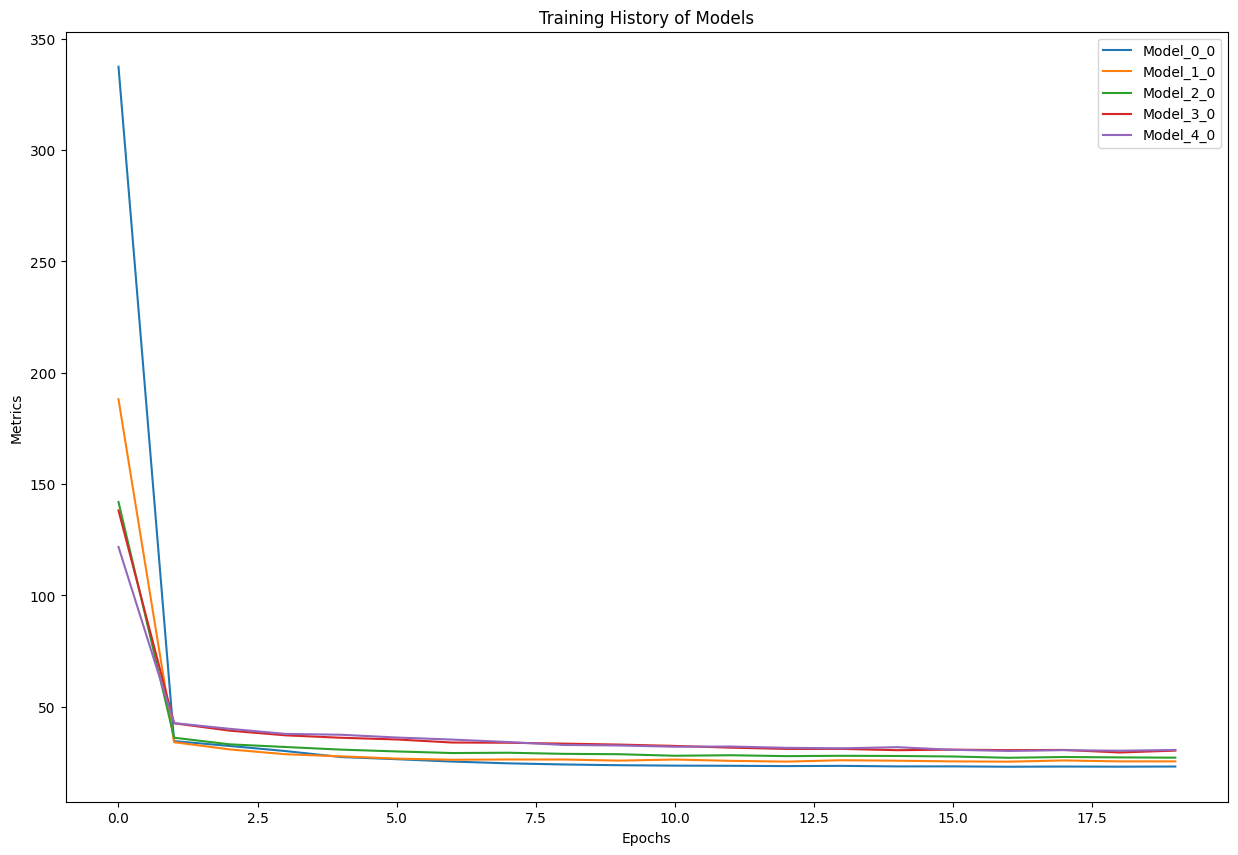

In [126]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_top_molar_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_top_molar_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_top_molar_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_top_molar_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_top_molar_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

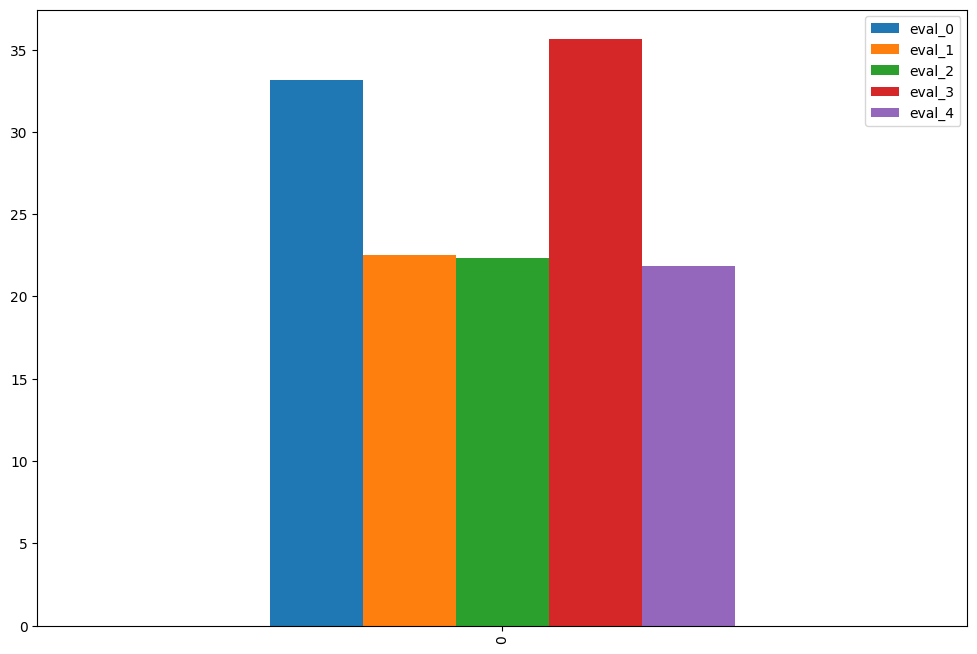

In [127]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярного расхода верхнего продукта колонны

In [128]:
## Тестовая и обучающая выборки
X = column_top_molar_flow_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
]]

y = column_top_molar_flow_data[[
    'sweet_gas molar flow, kgmol/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_top_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((410240, 24), (410240, 1))

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_top_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_top_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_top_molar_flow_history = column_top_molar_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12820/12820 [==============================] - 16s 1ms/step - loss: 111.6668 - mae: 111.6668
Epoch 2/50
12820/12820 [==============================] - 15s 1ms/step - loss: 31.1094 - mae: 31.1094
Epoch 3/50
12820/12820 [==============================] - 16s 1ms/step - loss: 27.9402 - mae: 27.9402
Epoch 4/50
12820/12820 [==============================] - 16s 1ms/step - loss: 26.9369 - mae: 26.9369
Epoch 5/50
12820/12820 [==============================] - 16s 1ms/step - loss: 26.4889 - mae: 26.4889
Epoch 6/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.9609 - mae: 25.9609
Epoch 7/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.7341 - mae: 25.7341
Epoch 8/50
12820/12820 [==============================] - 17s 1ms/step - loss: 25.9917 - mae: 25.9917
Epoch 9/50
12820/12820 [==============================] - 16s 1ms/step - loss: 25.7226 - mae: 25.7226
Epoch 10/50
12820/12820 [==============================] - 16s 1ms/step - loss: 

In [44]:
column_top_molar_flow_model.evaluate(X_test_normal, y_test)

3205/3205 [==============================] - 5s 1ms/step - loss: 27.3249 - mae: 27.3249


[27.324905395507812, 27.324905395507812]

In [45]:
y_pred = column_top_molar_flow_model.predict(X_test_normal)

3205/3205 [==============================] - 3s 791us/step


In [46]:
y_pred

array([[ 7365.0747],
       [ 2373.1086],
       [ 7728.877 ],
       ...,
       [ 8191.372 ],
       [ 1545.3043],
       [10363.992 ]], dtype=float32)

In [47]:
y_test

,"sweet_gas molar flow, kgmol/h"
337566,7345.852954
201781,2352.695530
215224,7619.401788
8834,6134.438896
394112,1684.639554
...,...
396710,10549.774841
447239,4747.585178
217230,8137.086251
397167,1537.065399


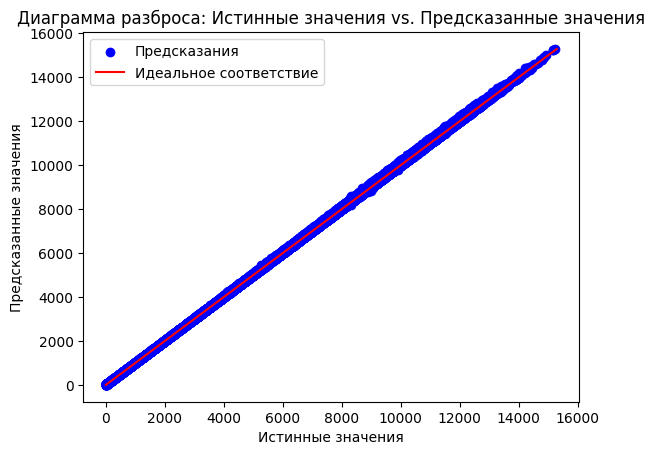

In [48]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [49]:
column_top_molar_flow_model.save('./models/amine_treatment_13_08/column_top_molar_flow_model.h5')

# Определение молярного расхода нижнего продукта

In [51]:
column_bot_molar_flow_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3', 'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h',
    'feed_gas CO2 mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
    'rich_amine molar flow, kgmol/h'
]]

In [52]:
column_bot_molar_flow_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,"feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h",...,lean_amine molecular weight,"lean_amine Mass density, kg/m3","lean_amine actual liquid flow, m3/h","lean_amine molar flow, kgmol/h","lean_amine H2S molar flow, kgmol/h","lean_amine CO2 molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h","rich_amine molar flow, kgmol/h"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,0.029347,1479.363928,0.022507,5870.716712,116.240769,131.495260,...,32.744629,1040.235933,347.215027,11541.804252,2.884096,33.501414,9999.846673,1505.572069,5657.648995,11754.871979
std,14.726834,86277.067509,2.254273,41.131813,0.056331,968.295001,0.010107,3433.502523,102.808912,102.021061,...,6.566487,13.984821,188.577804,6962.873087,2.095730,25.994329,6497.662992,981.655992,3340.435678,6998.373238
min,10.000000,1000.000000,17.630435,48.732168,0.000000,4.010348,0.005000,33.338025,0.005353,0.207002,...,18.043180,973.756588,14.101946,299.356341,0.035062,0.325252,194.673346,0.006981,0.004180,306.622963
25%,22.000000,74990.500000,24.160098,85.483707,0.000000,673.891096,0.013747,2916.163761,31.849751,49.448425,...,28.099839,1032.383569,184.956551,5868.173579,1.269090,13.449371,4897.851465,661.819137,2782.531515,6063.613525
50%,35.000000,149553.500000,25.725828,100.138569,0.000000,1360.659877,0.022486,5814.068691,86.399253,105.853246,...,33.812730,1041.412657,347.645421,11045.326239,2.429430,26.934611,9224.920955,1384.967497,5591.793562,11275.466605
75%,48.000000,224502.000000,27.293888,122.779305,0.033409,2167.533053,0.031276,8728.900707,176.810764,193.917310,...,37.526382,1050.665489,510.257249,16263.162662,4.056679,47.760824,13765.564888,2259.367346,8428.333741,16512.420586
max,60.000000,300000.000000,33.967309,341.551374,0.429151,5788.297432,0.040000,16404.642557,598.000656,585.760027,...,56.744250,1070.914903,712.550481,38549.039746,15.147930,190.433750,38445.322887,4640.158398,16132.965175,38544.083495


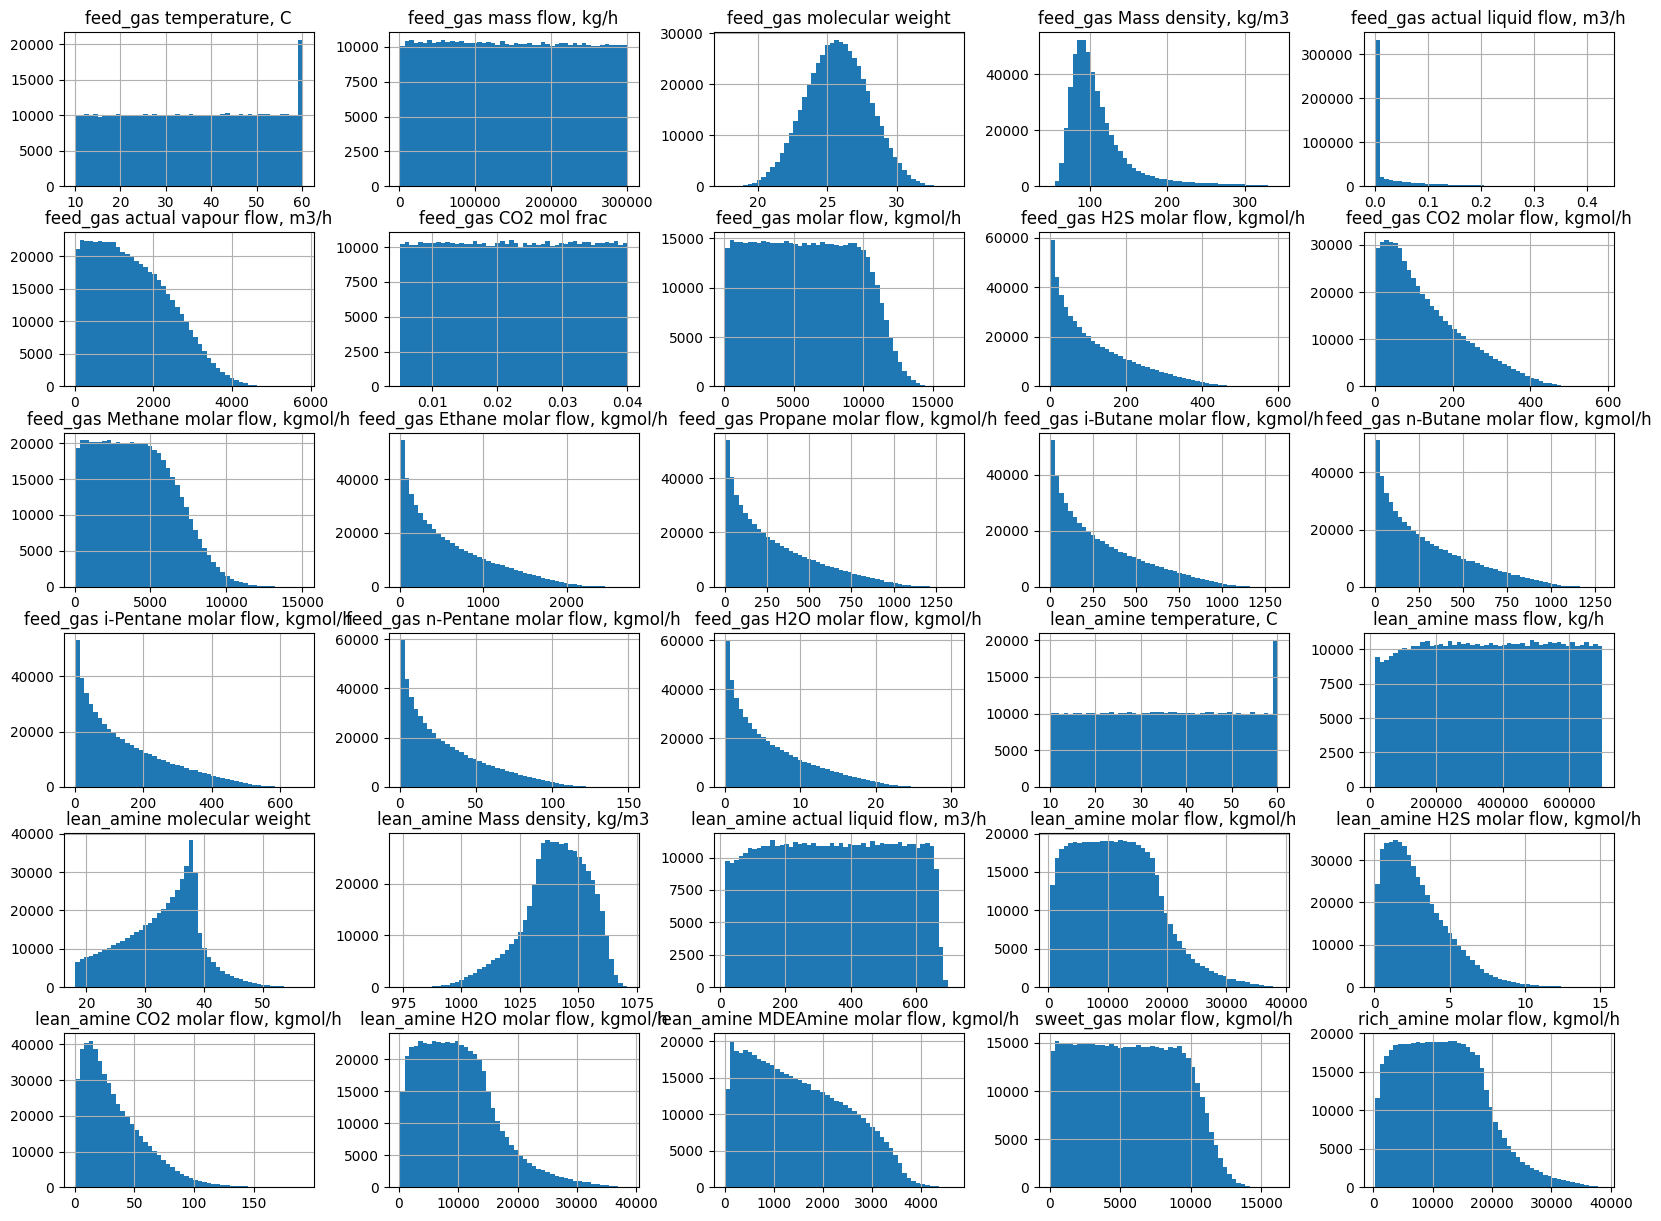

In [53]:
column_bot_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [55]:
corr_matrix = column_bot_molar_flow_data.corr()

corr_matrix['rich_amine molar flow, kgmol/h'].sort_values(ascending=False)

rich_amine molar flow, kgmol/h             1.000000
lean_amine molar flow, kgmol/h             0.999807
lean_amine H2O molar flow, kgmol/h         0.990797
lean_amine actual liquid flow, m3/h        0.910757
lean_amine mass flow, kg/h                 0.901333
lean_amine H2S molar flow, kgmol/h         0.830558
lean_amine CO2 molar flow, kgmol/h         0.777441
lean_amine MDEAmine molar flow, kgmol/h    0.511087
feed_gas H2S molar flow, kgmol/h           0.031731
feed_gas mass flow, kg/h                   0.025234
feed_gas molar flow, kgmol/h               0.024880
feed_gas Methane molar flow, kgmol/h       0.023064
feed_gas CO2 molar flow, kgmol/h           0.021477
feed_gas actual vapour flow, m3/h          0.020192
feed_gas n-Pentane molar flow, kgmol/h     0.017481
feed_gas Ethane molar flow, kgmol/h        0.016986
feed_gas i-Butane molar flow, kgmol/h      0.015918
feed_gas Propane molar flow, kgmol/h       0.015721
feed_gas H2O molar flow, kgmol/h           0.015717
feed_gas n-B

In [56]:
column_bot_molar_flow_data_mini = column_bot_molar_flow_data.sample(frac=0.5)

In [57]:
## Тестовая и обучающая выборки
X = column_bot_molar_flow_data_mini[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3', 'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h',
    'feed_gas CO2 mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

y = column_bot_molar_flow_data_mini[[
    'rich_amine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3', 'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h',
    'feed_gas CO2 mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((205120, 29), (205120, 1))

In [58]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_0 = column_bot_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 7s 1ms/step - loss: 880.0073 - mae: 880.0073
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 45.8911 - mae: 45.8911
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 34.1718 - mae: 34.1718
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 29.7756 - mae: 29.7756
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.5732 - mae: 27.5732
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.9392 - mae: 25.9392
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.0478 - mae: 25.0478
Epoch 8/20
6410/6410 [==============================] - 8s 1ms/step - loss: 24.0414 - mae: 24.0414
Epoch 9/20
6410/6410 [==============================] - 8s 1ms/step - loss: 23.0913 - mae: 23.0913
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.2786 - mae: 22.2786
Epoch 1

In [59]:
eval_0 = column_bot_molar_flow_model_0.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 740us/step - loss: 18.1720 - mae: 18.1720


In [60]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_1 = column_bot_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 8s 1ms/step - loss: 621.8989 - mae: 621.8989
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 34.2964 - mae: 34.2964
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 30.5855 - mae: 30.5855
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 28.4311 - mae: 28.4311
Epoch 5/20
6410/6410 [==============================] - 6s 1ms/step - loss: 26.7533 - mae: 26.7533
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 26.0738 - mae: 26.0738
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 24.8069 - mae: 24.8069
Epoch 8/20
6410/6410 [==============================] - 8s 1ms/step - loss: 24.0473 - mae: 24.0473
Epoch 9/20
6410/6410 [==============================] - 8s 1ms/step - loss: 22.9220 - mae: 22.9220
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 22.4523 - mae: 22.4523
Epoch 1

In [61]:
eval_1 = column_bot_molar_flow_model_1.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 856us/step - loss: 20.6707 - mae: 20.6707


In [62]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_2 = column_bot_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 9s 1ms/step - loss: 320.0801 - mae: 320.0801
Epoch 2/20
6410/6410 [==============================] - 8s 1ms/step - loss: 55.4181 - mae: 55.4181
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 50.1296 - mae: 50.1296
Epoch 4/20
6410/6410 [==============================] - 8s 1ms/step - loss: 51.4817 - mae: 51.4817
Epoch 5/20
6410/6410 [==============================] - 9s 1ms/step - loss: 48.8576 - mae: 48.8576
Epoch 6/20
6410/6410 [==============================] - 9s 1ms/step - loss: 49.0611 - mae: 49.0611
Epoch 7/20
6410/6410 [==============================] - 8s 1ms/step - loss: 49.4244 - mae: 49.4244
Epoch 8/20
6410/6410 [==============================] - 9s 1ms/step - loss: 47.1124 - mae: 47.1124
Epoch 9/20
6410/6410 [==============================] - 8s 1ms/step - loss: 49.8510 - mae: 49.8510
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 47.3203 - mae: 47.3203
Epoch 1

In [63]:
eval_2 = column_bot_molar_flow_model_2.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 862us/step - loss: 63.7739 - mae: 63.7739


In [64]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_3 = column_bot_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 7s 1ms/step - loss: 1181.2910 - mae: 1181.2910
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 50.3566 - mae: 50.3566
Epoch 3/20
6410/6410 [==============================] - 7s 1ms/step - loss: 31.7401 - mae: 31.7401
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 30.1872 - mae: 30.1872
Epoch 5/20
6410/6410 [==============================] - 7s 1ms/step - loss: 29.2225 - mae: 29.2225
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 28.3674 - mae: 28.3674
Epoch 7/20
6410/6410 [==============================] - 7s 1ms/step - loss: 27.5893 - mae: 27.5893
Epoch 8/20
6410/6410 [==============================] - 7s 1ms/step - loss: 26.7549 - mae: 26.7549
Epoch 9/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.8997 - mae: 25.8997
Epoch 10/20
6410/6410 [==============================] - 7s 1ms/step - loss: 25.2439 - mae: 25.2439
Epoch

In [65]:
eval_3 = column_bot_molar_flow_model_3.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 754us/step - loss: 17.6464 - mae: 17.6464


In [66]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history_4 = column_bot_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
6410/6410 [==============================] - 8s 1ms/step - loss: 397.7719 - mae: 397.7719
Epoch 2/20
6410/6410 [==============================] - 7s 1ms/step - loss: 41.4452 - mae: 41.4452
Epoch 3/20
6410/6410 [==============================] - 8s 1ms/step - loss: 38.4707 - mae: 38.4707
Epoch 4/20
6410/6410 [==============================] - 7s 1ms/step - loss: 37.5442 - mae: 37.5442
Epoch 5/20
6410/6410 [==============================] - 8s 1ms/step - loss: 36.6785 - mae: 36.6785
Epoch 6/20
6410/6410 [==============================] - 7s 1ms/step - loss: 35.1825 - mae: 35.1825
Epoch 7/20
6410/6410 [==============================] - 8s 1ms/step - loss: 34.7374 - mae: 34.7374
Epoch 8/20
6410/6410 [==============================] - 8s 1ms/step - loss: 34.3512 - mae: 34.3512
Epoch 9/20
6410/6410 [==============================] - 8s 1ms/step - loss: 34.0871 - mae: 34.0871
Epoch 10/20
6410/6410 [==============================] - 8s 1ms/step - loss: 33.7835 - mae: 33.7835
Epoch 1

In [67]:
eval_4 = column_bot_molar_flow_model_4.evaluate(X_test_normal, y_test)

1603/1603 [==============================] - 1s 664us/step - loss: 19.9302 - mae: 19.9302


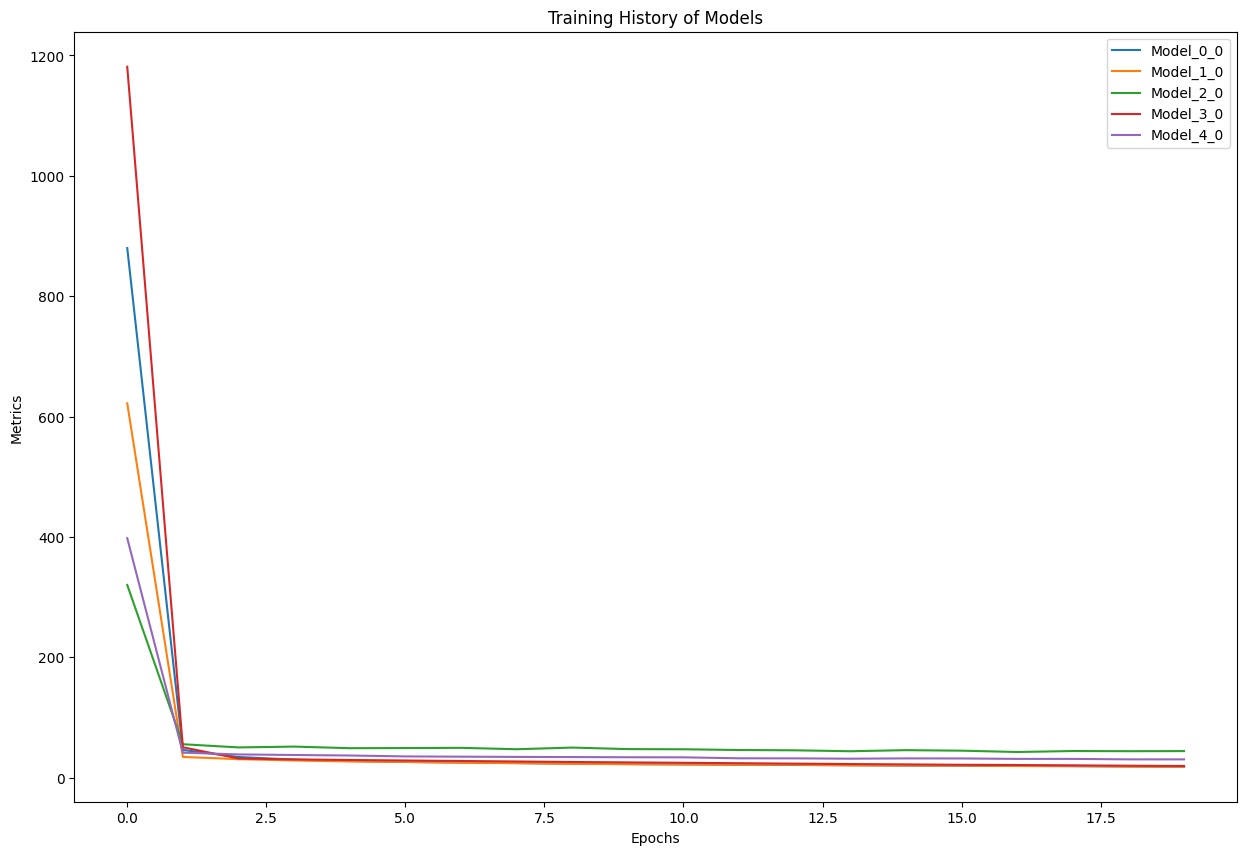

In [68]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(column_bot_molar_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(column_bot_molar_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(column_bot_molar_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(column_bot_molar_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(column_bot_molar_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

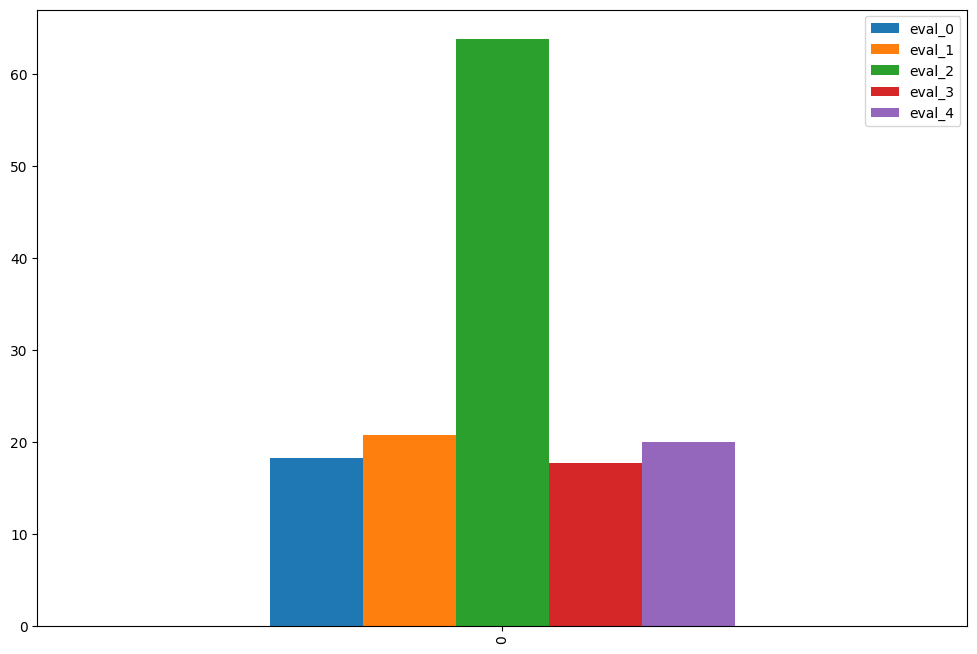

In [69]:
eval_pd = pd.DataFrame({
    'eval_0': eval_0[1],
    'eval_1': eval_1[1],
    'eval_2': eval_2[1],
    'eval_3': eval_3[1],
    'eval_4': eval_4[1],
}, index=[0])

ax = eval_pd.plot(kind='bar', subplots=False, figsize=(12, 8))
plt.show();

## Основная модель для определения молярного расхода нижнего продукта колонны

In [71]:
## Тестовая и обучающая выборки
X = column_bot_molar_flow_data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3', 'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h',
    'feed_gas CO2 mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
]]

y = column_bot_molar_flow_data[[
    'rich_amine molar flow, kgmol/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight',
    'feed_gas Mass density, kg/m3', 'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h',
    'feed_gas CO2 mol frac',
    'feed_gas molar flow, kgmol/h', 'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h',
    'feed_gas Methane molar flow, kgmol/h', 'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h',
    'feed_gas i-Butane molar flow, kgmol/h', 'feed_gas n-Butane molar flow, kgmol/h',
    'feed_gas i-Pentane molar flow, kgmol/h', 'feed_gas n-Pentane molar flow, kgmol/h', 'feed_gas H2O molar flow, kgmol/h',
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h',
    'sweet_gas molar flow, kgmol/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/amine_treatment/column_bot_prod_molar_flow.pkl')

X_train_normal.shape, y_train.shape

((410240, 29), (410240, 1))

In [72]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
column_bot_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(29, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
column_bot_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
column_bot_molar_flow_history = column_bot_molar_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
12820/12820 [==============================] - 14s 1ms/step - loss: 586.8033 - mae: 586.8033
Epoch 2/50
12820/12820 [==============================] - 14s 1ms/step - loss: 32.0884 - mae: 32.0884
Epoch 3/50
12820/12820 [==============================] - 13s 1ms/step - loss: 29.8797 - mae: 29.8797
Epoch 4/50
12820/12820 [==============================] - 14s 1ms/step - loss: 28.3765 - mae: 28.3765
Epoch 5/50
12820/12820 [==============================] - 14s 1ms/step - loss: 27.0904 - mae: 27.0904
Epoch 6/50
12820/12820 [==============================] - 14s 1ms/step - loss: 25.6810 - mae: 25.6810
Epoch 7/50
12820/12820 [==============================] - 14s 1ms/step - loss: 24.2513 - mae: 24.2513
Epoch 8/50
12820/12820 [==============================] - 14s 1ms/step - loss: 23.1091 - mae: 23.1091
Epoch 9/50
12820/12820 [==============================] - 14s 1ms/step - loss: 21.6182 - mae: 21.6182
Epoch 10/50
12820/12820 [==============================] - 14s 1ms/step - loss: 

In [73]:
column_bot_molar_flow_model.evaluate(X_test_normal, y_test)

3205/3205 [==============================] - 3s 887us/step - loss: 11.6767 - mae: 11.6767


[11.676688194274902, 11.676688194274902]

In [74]:
y_pred = column_bot_molar_flow_model.predict(X_test_normal)

3205/3205 [==============================] - 3s 854us/step


In [75]:
y_pred

array([[14235.398 ],
       [ 4913.2065],
       [13800.384 ],
       ...,
       [ 1499.5438],
       [10556.427 ],
       [20684.438 ]], dtype=float32)

In [76]:
y_test

,"rich_amine molar flow, kgmol/h"
337566,14218.461543
201781,4904.538730
215224,13786.843314
8834,7278.214033
394112,8092.792319
...,...
396710,8160.841837
447239,17236.142677
217230,1493.708531
397167,10549.402880


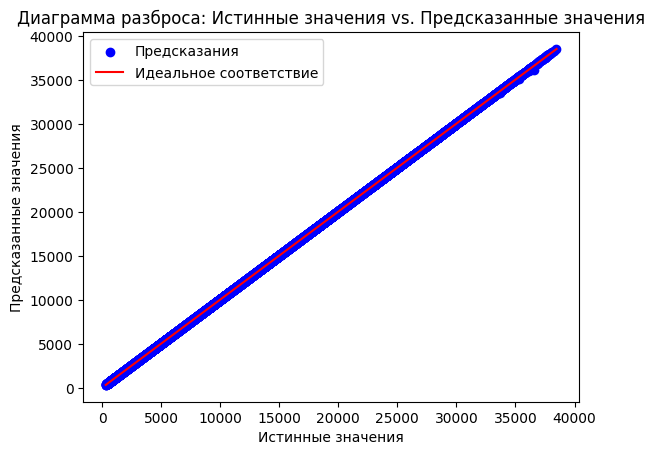

In [77]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [78]:
column_bot_molar_flow_model.save('./models/amine_treatment_13_08/column_bot_molar_flow_model.h5')

# Определение температуры верха колонны

In [79]:
list(data.columns)

['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
 'Absorber number of stages',
 'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane

In [80]:
column_top_temperature_data = data[[
    'feed_gas temperature, C', 'feed_gas mass flow, kg/h', 'feed_gas molecular weight', 'feed_gas Mass density, kg/m3',
    'feed_gas actual liquid flow, m3/h', 'feed_gas actual vapour flow, m3/h', 'feed_gas molar flow, kgmol/h',
    'feed_gas H2S molar flow, kgmol/h', 'feed_gas CO2 molar flow, kgmol/h', 'feed_gas Methane molar flow, kgmol/h',
    'feed_gas Ethane molar flow, kgmol/h', 'feed_gas Propane molar flow, kgmol/h', 'feed_gas i-Butane molar flow, kgmol/h',
    'feed_gas n-Butane molar flow, kgmol/h', 'feed_gas i-Pentane molar flow, kgmol/h',
    'feed_gas n-Pentane molar flow, kgmol/h',  'feed_gas H2O molar flow, kgmol/h', 
    'lean_amine temperature, C', 'lean_amine mass flow, kg/h', 'lean_amine molecular weight',
    'lean_amine Mass density, kg/m3', 'lean_amine actual liquid flow, m3/h', 'lean_amine actual vapour flow, m3/h',
    'lean_amine molar flow, kgmol/h', 'lean_amine H2S molar flow, kgmol/h', 'lean_amine CO2 molar flow, kgmol/h',
    'lean_amine Methane molar flow, kgmol/h', 'lean_amine Ethane molar flow, kgmol/h',
    'lean_amine Propane molar flow, kgmol/h', 'lean_amine i-Butane molar flow, kgmol/h',
    'lean_amine n-Butane molar flow, kgmol/h', 'lean_amine i-Pentane molar flow, kgmol/h',
    'lean_amine n-Pentane molar flow, kgmol/h', 'lean_amine H2O molar flow, kgmol/h',
    'lean_amine MDEAmine molar flow, kgmol/h', 'sweet_gas molar flow, kgmol/h', 'rich_amine molar flow, kgmol/h',
    'sweet_gas temperature, C'
]]

In [81]:
column_top_temperature_data.describe()

,"feed_gas temperature, C","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h","feed_gas molar flow, kgmol/h","feed_gas H2S molar flow, kgmol/h","feed_gas CO2 molar flow, kgmol/h","feed_gas Methane molar flow, kgmol/h",...,"lean_amine Propane molar flow, kgmol/h","lean_amine i-Butane molar flow, kgmol/h","lean_amine n-Butane molar flow, kgmol/h","lean_amine i-Pentane molar flow, kgmol/h","lean_amine n-Pentane molar flow, kgmol/h","lean_amine H2O molar flow, kgmol/h","lean_amine MDEAmine molar flow, kgmol/h","sweet_gas molar flow, kgmol/h","rich_amine molar flow, kgmol/h","sweet_gas temperature, C"
count,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000,...,512800.0,512800.0,512800.0,512800.0,512800.0,512800.000000,512800.000000,512800.000000,512800.000000,512800.000000
mean,35.069259,149865.354606,25.727608,111.359132,0.029347,1479.363928,5870.716712,116.240769,131.495260,4009.062337,...,0.0,0.0,0.0,0.0,0.0,9999.846673,1505.572069,5657.648995,11754.871979,35.156846
std,14.726834,86277.067509,2.254273,41.131813,0.056331,968.295001,3433.502523,102.808912,102.021061,2488.283871,...,0.0,0.0,0.0,0.0,0.0,6497.662992,981.655992,3340.435678,6998.373238,20.660126
min,10.000000,1000.000000,17.630435,48.732168,0.000000,4.010348,33.338025,0.005353,0.207002,16.662736,...,0.0,0.0,0.0,0.0,0.0,194.673346,0.006981,0.004180,306.622963,-86.001292
25%,22.000000,74990.500000,24.160098,85.483707,0.000000,673.891096,2916.163761,31.849751,49.448425,1929.630171,...,0.0,0.0,0.0,0.0,0.0,4897.851465,661.819137,2782.531515,6063.613525,24.554853
50%,35.000000,149553.500000,25.725828,100.138569,0.000000,1360.659877,5814.068691,86.399253,105.853246,3841.024204,...,0.0,0.0,0.0,0.0,0.0,9224.920955,1384.967497,5591.793562,11275.466605,37.432344
75%,48.000000,224502.000000,27.293888,122.779305,0.033409,2167.533053,8728.900707,176.810764,193.917310,5821.054095,...,0.0,0.0,0.0,0.0,0.0,13765.564888,2259.367346,8428.333741,16512.420586,49.548660
max,60.000000,300000.000000,33.967309,341.551374,0.429151,5788.297432,16404.642557,598.000656,585.760027,15013.476119,...,0.0,0.0,0.0,0.0,0.0,38445.322887,4640.158398,16132.965175,38544.083495,82.882800


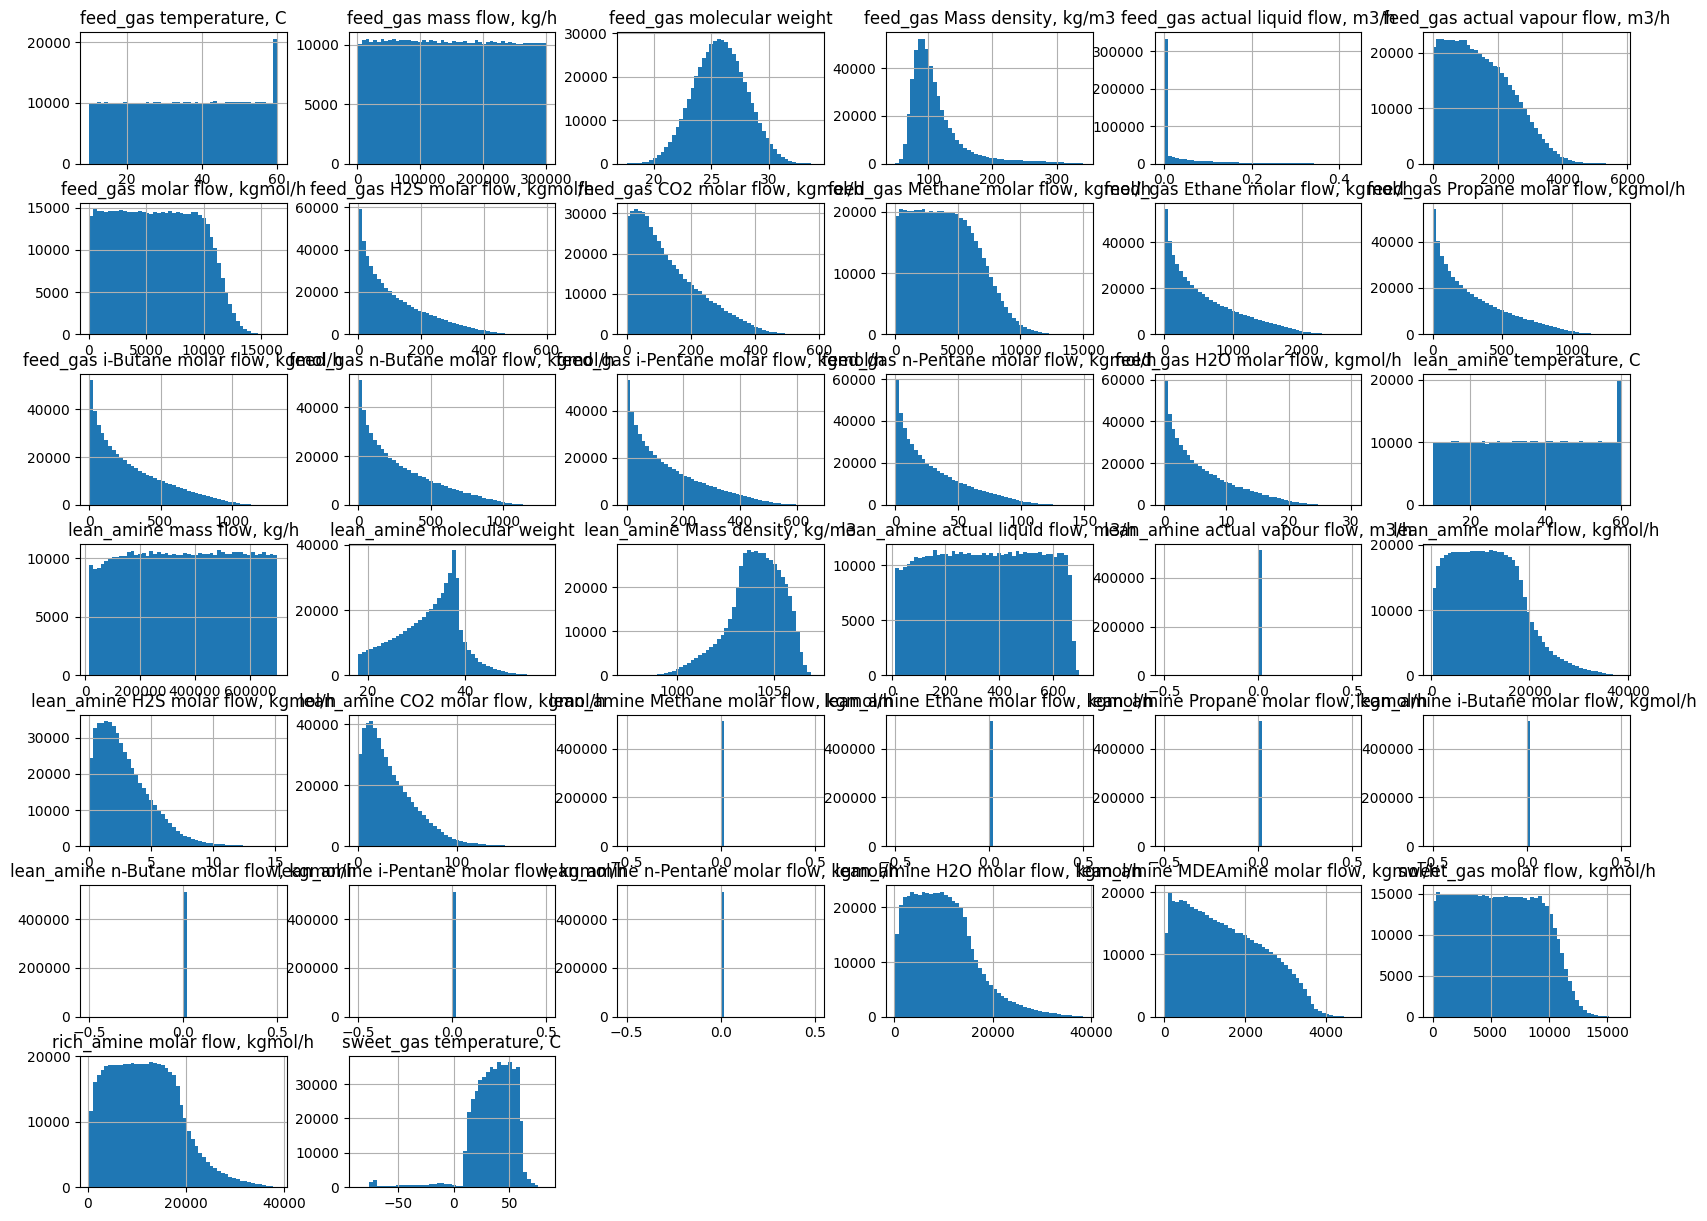

In [82]:
column_top_temperature_data.hist(bins=50, figsize=(20, 15));

In [83]:
corr_matrix = column_top_temperature_data.corr()

corr_matrix['sweet_gas temperature, C'].sort_values(ascending=False)

sweet_gas temperature, C                    1.000000
lean_amine temperature, C                   0.764152
feed_gas actual vapour flow, m3/h           0.154059
feed_gas Methane molar flow, kgmol/h        0.124579
sweet_gas molar flow, kgmol/h               0.110687
feed_gas molar flow, kgmol/h                0.107895
feed_gas CO2 molar flow, kgmol/h            0.097285
feed_gas H2S molar flow, kgmol/h            0.089867
feed_gas mass flow, kg/h                    0.088774
feed_gas temperature, C                     0.079689
feed_gas H2O molar flow, kgmol/h            0.070125
feed_gas n-Pentane molar flow, kgmol/h      0.065170
feed_gas i-Pentane molar flow, kgmol/h      0.037170
feed_gas Propane molar flow, kgmol/h        0.034621
feed_gas Ethane molar flow, kgmol/h         0.029849
feed_gas i-Butane molar flow, kgmol/h       0.023042
feed_gas n-Butane molar flow, kgmol/h       0.021845
lean_amine molecular weight                 0.012228
feed_gas actual liquid flow, m3/h          -0.